## **Overview**

&emsp;Adaptive Boosting (AdaBoost), first introduced by Freund and Schapire in 1997, is a supervised learning algorithm that combines many weak classifiers into a strong classifier. In this case, a weak classifier is any model that can perform slightly better than random guessing. AdaBoost builds the final model sequentially, where each weak learner is trained on a weighted dataset, and misclassified points from previous iterations are given higher weight in the sequential iterations. In this way, the later learners are focused more on the difficult and misclassified data points, and the ensemble learning continually improves throughout training.
 
&emsp;At each iteration, AdaBoost fits a weak learner, evaluates its weighted classification error, and assigns that learner a weight based on its performance. The final prediction is a weighted vote over all weak learners. The most common weak learner used in AdaBoost are decision stumps, which are used in this project. Decision stumps are decision trees with a depth of one, and they are used as they are fast to train. If any weak learner is found to have a classification error of 50%, it is omitted from the ensemble as that learner is no better than random guessing.  

&emsp;AdaBoost has several advantages as a model. Conceptually, as it is a combination of weak learners, it is simple and requires very few hyperparameters. The algorithm can achieve high accuracy with weak base models and often avoid overfitting, especially when using decision stumps. In other cases, it is also model-agnostic, and any classifier capable of handling weighted data can serve as the base learner.

&emsp;However, there are important limitations to consider when choosing AdaBoost. As stated above, there is an emphasis on misclassified points in each iteration of boosting, meanign it is highly sensitive to nosie and outliers. This means, if there is a mislabeled point that recieves a high weight repeatedly, the ensemble will focus too much on this point and trying to correct it, and this reduces generalization. AdaBoost can lack interpretability due to the ensemble nature, the final model and decision boundary is complex, and the process of iterative weighting could be difficult to explain in simple rules. Also, even though AdaBoost is resistant to overfitting, the performance of the model can decrease when the number of iterations is very large.  

### **Representation**  
In binary classification with labels $y \in \{-1, +1\}$, each weak learner $h_t(x)$ outputs a prediction in the same set. AdaBoost combines $T$ weak learners, weighted by their important $w_t$:

$$
F(x) = \sum_{t=1}^{T} w_t h_t(x)
$$

To convert this score into a single-numbered prediciton, AdaBoost uses the sign function:

$$
h_s(x) = \mathrm{sign}(F(x))
$$

Therefore, the representation is an additive linear model of weak classifiers, where each classifier's contribution is scaled by $\alpha_t$.  



### **Loss**  
AdaBoost minimizes the exponential loss:
$$
L = \sum_{i=1}^{n} \exp(-y_i F(x_i))
$$
Where $F(x_i) = \sum_{t=1}^{T} w_t h_t(x_i)$
This loss penalizes wrong predictions more heavily. If $y_i F(x_i) < 0$, the eponential term becomes large, increasing the weight assigned to that sample in the next iteration, $D_i^{(t+1)}. This adaptiveness is the key property of AdaBoost.  


### **Optimizer**  
AdaBoost uses a stage-wise, greedy optimization strategy. Instead of optimizing all parameters jointly, it adds one weak learner at a time, choosing $h_t$ and $w_t$ that reduce the exponential loss the most at each round. At iteration $t$ with weights $D_i^{(t)}$ the weighted classification error is:
$$
\epsilon_t = \sum_{i=1}^{m} D_i^{(t)} \mathbf{1}_{[y_i \ne h_t(x_i)]}
$$
The learner's weight is then:
$$
w_t = \frac{1}{2} \log\left( \frac{1}{\epsilon_t} - 1 \right)
$$
Sample weights are updated using:
$$
D_i^{(t+1)} = \frac{D_i^{(t)} exp(-w_ty_ih_t(x_i))}{\sum_{j=1}^mD_j^{(t)}exp(-w_ty_jh_t(x_j))}
$$
for all  $i = 1,...,m$  
and are normalized so that:
$$
\sum_{i=1}^m D_i^{(t+1)} = 1
$$
The final classifier is obtained as the sign of the weighted sum of all weak learners:
$$
h_s(x) = \mathrm{sign}(\sum_{t=1}^T w_th_t(x))
$$



### **Pseudocode**  
**Input:**   
training set S ${(x_i, y_i)},...,{(x_m, y_m)}$
weak learner $WL$
number of rounds $T$
**Initialize:**    
example weights: $D^{(1)} = (\frac{1}{m},...\frac{1}{m})$

**For** $t = 1$ to $T$:
&emsp;Train weak learner $h_t = WL(D^{(t)}, S)$
&emsp;Compute weighted error:  
&emsp;&emsp;$\epsilon_t = \sum_{i=1}^m D_i^{(t)} \mathbf{1}_{[y_i \ne h_t(x_i)]}$
&emsp;Compute learner weight:  
&emsp;&emsp;$w_t = \frac{1}{2} \log\left( \frac{1}{\epsilon_t} - 1 \right)$
&emsp;Update example weights:  
&emsp;&emsp;$D_i^{(t+1)} =  \frac{D_i^{(t)} exp(-w_ty_ih_t(x_i))}{\sum_{j=1}^mD_j^{(t)}exp(-w_ty_jh_t(x_j))}$ for all $i = 1,...,m$
&emsp;Normalize weights so that:  
&emsp;&emsp;$\sum_{i=1}^m D_i^{(t+1)} = 1$

**Output** the hypothesis $h_s(x) = \mathrm{sign}(\sum_{t=1}^T w_th_t(x))$

### **References**  
Freund, Y. & Schapire, R.E., 1997. A Decision‑Theoretic Generalization of On‑Line Learning and an Application to Boosting. Journal of Computer and System Sciences, 55(1), pp.119–139. https://doi.org/10.1006/jcss.1997.1504

GeeksforGeeks, 2025. AdaBoost in Machine Learning. [online] Available at: https://www.sciencedirect.com/science/article/pii/S002200009791504X [Accessed 5 December 2025].  

Schapire, R.E., 2013. Explaining AdaBoost. In: B. Schölkopf, Z. Luo and V. Vovk, eds. Empirical Inference: Festschrift in Honour of Vladimir N. Vapnik. Berlin: Springer, pp.37–52. DOI: 10.1007/978‑3‑642‑41136‑6_5.  

de Giorgio, A., 2023. Systematic review of class imbalance problems in machine learning and deep learning solutions in manufacturing. Expert Systems with Applications, 229, p.120193. Available at: https://www.sciencedirect.com/science/article/pii/S0278612523002157 [Accessed 5 December 2025].

## **Model**

In [1]:
import numpy as np
import copy

def sigmoid(x):
    """ Applies the sigmoid function on a numpy array x """
    return 1 / (1+np.exp(x))

def node_score_gini(prob):
    """ Calculates the gini impurity given a proportion """
    return 2 * prob * (1-prob)

class Stump(object):
    """ Decision Stump binary classifier
    @attrs:
        distribution:    1D numpy array (n_samples) of the sample weight distribution
        gain_function:   a function which defines the impurity score used in _calc_gain
    """
    def __init__(self, distribution, gain_function=node_score_gini):
        """ Initializes a Stump object with a given sample distribution """
        self.gain_function = gain_function
        self.distribution = distribution # D^(t) for this learner
        self.split_ftr_indx = None
        self.split_point = None

    def train(self,X,y):
        """ Trains the Stump using a single round of the ID3 optimizer
            and sets .split_ftr_indx and .split_point to the split which maximizes gain
        @params:
            X: a 2D (n_samples x n_features) numpy array of training data
            y: a 1D (n_samples) numpy array of class labels in {-1, 1}
        @return: None
        """
        ftrs = X.shape[1]
        # loop over all ftrs
        gains = []
        split_points = []
        for f in range(ftrs):
            x_ftr = X[:,f]

            # get all possible values
            uniq = np.sort(np.unique(x_ftr))
            
            # check there are at least two values,
            # consistent ftrs skipped
            if uniq.shape[0] < 2:
                gains.append(-np.inf)
                split_points.append(None)
                continue
            
            # calculate midpoints
            mids = (uniq[1:] + uniq[:-1])/2 
            local_gains = []

            # loop over all unique values
            for split in mids:
                x_true = x_ftr > split # get a boolean x based on split
                local_gains.append( self._calc_gain(x_true, y) )
            
            best_local_indx = int(np.argmax(local_gains))
            gains.append(local_gains[best_local_indx])
            split_points.append(mids[best_local_indx])

        # find and set best split
        best_gain_indx = int(np.argmax(gains))
        self.split_ftr_indx = best_gain_indx
        self.split_point = split_points[best_gain_indx]

        return None
    
    def loss(self, X, y):
        """ Outputs the AdaBoost weak learner loss, redefined as the 0-1 loss 
            weighted using self.distribution
        @params:
            X: a 2D (n_samples x n_features) numpy array
            y: a 1D (n_samples) numpy array of class labels in {-1, 1}
        @return:
            a float number indicating loss (between 0 and 1)
        """
        y_hat = self.predict(X)
        return np.sum( self.distribution * (y_hat != y).astype(int) )
    
    def predict(self,X):
        """ Outputs a predicted label for each input row
        @params:
            X: a 2D (n_samples x n_features) numpy array
        @return:
            a 1D (n_samples) numpy array of predicted labels -1 or 1
        """
        xi = X[:,self.split_ftr_indx]
        return np.where(xi < self.split_point, 1, -1)
    
    def _calc_gain(self, x_true, y):
        """ Helper function to calculate the gain on a given split
        @params:
            x_true: a 1D (n_samples) boolean numpy array
            y: a 1D (n_samples) numpy array of labels
        @return:
            a float indicating the change in sample-weighted impurity
        """
        w = self.distribution
        # p(y=1)
        cpy1 = self.gain_function((w*(y==1)).sum() / w.sum())
        if w[x_true].sum() > 0:
            py1_true = (w[x_true]*(y[x_true]==1)).sum() / w[x_true].sum()
        else:
            py1_true = 0.0
        if w[~x_true].sum() > 0:
            py1_false = (w[~x_true]*(y[~x_true]==1)).sum() / w[~x_true].sum()
        else:
            py1_false = 0.0

        c_true = self.gain_function(py1_true) * w[x_true].sum()
        c_false = self.gain_function(py1_false) * w[~x_true].sum()

        gain = cpy1 - ((c_true + c_false) / w.sum())
        return gain
    
class AdaBoost(object):
    """ AdaBoost ensemble classifier
    @attrs:
        n_estimators:    the number of weak learners
        learner_class:   the class used to build each weak learner
    """
    def __init__(self, n_estimators=50, learner_class=Stump):
        """ Initializes an AdaBoost object with n_estimators of class Stump """
        self.n_estimators = n_estimators # number of learners T
        self.weights = None # weights for each learner
        self.learners = [] # list of Stump objects
        self.learner_class = learner_class
        self.distribution = None # distribution at each stage

    def train(self, X, y):
        """ Trains the ensemble using greedy optimization on each weak learner
        @params:
            X: a 2D (n_samples x n_features) numpy array of training data
            y: a 1D (n_samples) numpy array of class labels in {-1, 1}
        @return: None
        """
        m = X.shape[0]
        X = X.copy()
        y = y.copy()
        # make sure in range (-1,1)
        if set([0,1]).difference(np.unique(y)) == set():
            y = np.where(y == 0, -1, 1)
        # init D^(t) and w
        self.distribution = np.ones(m) * (1/m)
        self.weights = np.zeros(self.n_estimators)

        # for 1 to T
        for t in range(self.n_estimators):
            # invoke wl
            wl = self.learner_class(self.distribution)
            wl.train(X,y)

            # calculate weighted error and then w_t
            error = wl.loss(X,y)
            # clip error to avoid issues when calculating w_t
            eps = 1e-12
            error = np.clip(error, eps, 1 - eps)
            # calculate weight
            w_t = 0.5 * np.log( (1-error) / error )

            # set learner weight and update distribution
            self.weights[t] = w_t
            self._update_distribution(w_t, X, y, wl)
            self.learners.append(wl)

        return None
    
    def predict(self, X):
        """ Outputs a predicted label for each input row
        @params:
            X: a 2D (n_samples x n_features) numpy array
        @return:
            a 1D (n_samples) numpy array of predicted labels -1 or 1
        """
        # initializes all predictions as 0
        y_hat = np.zeros(X.shape[0]) 
        # for each learner
        for t in range(self.n_estimators):
            y_hat_t = self.learners[t].predict(X) # predict for all rows
            y_hat += (self.weights[t] * y_hat_t) # update by weight

        # calculate overall prediction using sign
        return np.sign(y_hat)
    
    def loss(self, X, y):
        """ Calculates the 0-1 loss
        @params:
            X: a 2D (n_samples x n_features) numpy array
            y: a 1D (n_samples) numpy array of true class labels in {-1, 1}
        @return:
            a float number indicating loss (between 0 and 1)
        """
        y_hat = self.predict(X)

        return np.mean(y_hat != y)
    
    def _update_distribution(self, w, X, y, wl):
        """ Helper function to update the sample weights distribution
        @params:
            w: stored sample distribution for learner t
            X: a 2D (n_samples x n_features) numpy array
            y: a 1D (n_samples) numpy array of labels
            wl: weak learner at t
        @return:
            None
        """
        update = self.distribution * np.exp( -w * y * wl.predict(X) )
        D = update / np.sum(update)
        self.distribution = D

        return None

## **Check Model**

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
import pytest

## HELPER FUNCTIONS ## for sklearn testing
def gini_from_sklearn(x, y, d, stump=DecisionTreeClassifier(max_depth=1)):
    ''' Calculates the gini gain from a trained sklearn decision stump
    @params:
        x: a 2D (n_examples x n_features) numpy array  of training data
        y: a 1D (n_examples) numpy array with labels -1 or 1
        d: a 1D (n_examples) numpy array of sample weights
        stump: a sklearn DecisionTreeClassifier object initialized with max_depth=1
    @return:
        The difference in weighted gini impurity after the chosen split
    '''
    # fit the sklearn stump
    stump.fit(x, y, sample_weight=d)
    # get gini from root
    gini_root = stump.tree_.impurity[0]
    # get gini and weights after split
    gini_1,gini_2 = stump.tree_.impurity[1], stump.tree_.impurity[2]
    w = stump.tree_.weighted_n_node_samples
    p1, p2 = w[1]/w[0], w[2]/w[0]
    # calculate weighted gini difference
    return gini_root - ( (p1 * gini_1) + (p2 * gini_2) )

def split_from_sklearn(x,y,d,stump=DecisionTreeClassifier(max_depth=1)):
    ''' Trains a sklearn decision stump and returns the feature split on
        and the splitting threshold
    @params:
        x: a 2D (n_examples x n_features) numpy array  of training data
        y: a 1D (n_examples) numpy array with labels -1 or 1
        d: a 1D (n_examples) numpy array of sample weights
        stump: a sklearn DecisionTreeClassifier object initialized with max_depth=1
    @return:
        The index of the feature split on
        The threshold value used for splitting on that feature
    '''
    # fit the sklearn stump
    stump.fit(x, y, sample_weight=d)
    ftr = stump.tree_.feature[0]
    thresh = stump.tree_.threshold[0]
    return ftr, thresh

In [3]:
## UNIT TESTS ##

# initialize a random state
np.random.seed(0)

# test data
x1 = np.array([[0, 1, 1], [0, 1, 1], [1, 1, 1], [1, 1, 0], [0, 1, 0]])
y1 = np.array([1, 1, -1, 1, 1])
d1 = np.array([1/15, 2/15, 1/5, 4/15, 1/3])

x2 = np.array([[1, 1, 1], [0, 1, 0], [1, 1, 1], [1, 0, 1], [0, 0, 1]])
y2 = np.array([1, 1, -1, -1, 1])
d2 = np.array([0.2,0.2,0.2,0.2,0.2])

x1_test = np.array([[1, 1, 1], [0, 1, 0], [1, 1, 1], [1, 0, 1], [0, 0, 1]])
y1_test = np.array([-1, 1, -1, 1, 1])
x2_test = np.array([[0, 1, 1], [0, 1, 1], [1, 1, 1], [1, 1, 0], [0, 1, 0]])
y2_test = np.array([-1, 1, -1, -1, -1])

## test `Stump` class ##
stump1 = Stump(distribution=d1)
stump2 = Stump(distribution=d2)

# test ._calc_gain()
# check if in range
assert 0.0 <= stump1._calc_gain(x1[:,2] == True, y1) <= 0.5
assert 0.0 <= stump2._calc_gain(x1[:,2] == True, y1) <= 0.5
# check against sklearn
assert (stump1._calc_gain(x1[:,2] == True, y1) == pytest.approx(gini_from_sklearn(x1, y1, d1),0.01))
assert (stump2._calc_gain(x2[:,0] == True, y2) == pytest.approx(gini_from_sklearn(x2, y2, d2),0.01))

# test .train()
# check split ftrs and threshold
stump1.train(x1,y1)
assert (stump1.split_ftr_indx, stump1.split_point) == split_from_sklearn(x1,y1,d1)
stump2.train(x2,y2)
assert (stump2.split_ftr_indx, stump2.split_point) == split_from_sklearn(x2,y2,d2)

# test .predict()
# check output shape
assert stump1.predict(x1_test).shape == (5,)
assert stump2.predict(x2_test).shape == (5,)
# check output
assert stump1.predict(x1_test).tolist() == np.array([-1, 1, -1, -1, -1]).tolist()
assert stump2.predict(x2_test).tolist() == np.array([1, 1, -1, -1, 1]).tolist()

## test `AdaBoost` class ##
ada1 = AdaBoost()
ada2 = AdaBoost()

# test ._update_distribution()
ada1.distribution = np.ones(5)/5 # equal weights
ada1._update_distribution(1, x1_test, y1_test, stump1)

# check output shape and valid distribution (sum to 1)
assert ada1.distribution.shape == (5,)
assert ada1.distribution.sum() == pytest.approx(1,0.01)
# check output
assert ada1.distribution == pytest.approx(np.array([0.0562,0.0562,0.0562,0.4156,0.4156]),0.01)

ada2.distribution = np.array([1,0,0,0,0]) # single weight (edge case)
ada2._update_distribution(1, x2_test, y2_test, stump2)

assert ada2.distribution.shape == (5,)
assert ada2.distribution.sum() == pytest.approx(1,0.01)
assert ada2.distribution == pytest.approx(np.array([1,0,0,0,0]),0.01)

# test .train() and .predict()
ada1.train(x1, y1)
ada2.train(x2, y2)

# ensure correct number of estimators produced
assert len(ada1.learners) == 50
assert len(ada2.learners) == 50

# all of the learners are trained correctly (valid distributions) after each round
assert all([sum(learner.distribution) == pytest.approx(1,0.01) for learner in ada1.learners])
assert all([sum(learner.distribution) == pytest.approx(1,0.01) for learner in ada2.learners])

# check prediction shape
assert ada1.predict(x1_test).shape == y1_test.shape
assert ada2.predict(x2_test).shape == y2_test.shape

# check predictions against sklearn
sk1 = AdaBoostClassifier().fit(x1,y1)
assert ada1.predict(x1_test).tolist() == sk1.predict(x1_test).tolist()
sk2 = AdaBoostClassifier().fit(x2,y2)
assert ada2.predict(x2_test).tolist() == sk2.predict(x2_test).tolist()

# check .loss()
# in range
assert 0.0 <= ada1.loss(x1_test, y1_test) <= 1.0
assert 0.0 <= ada2.loss(x2_test, y2_test) <= 1.0
# calculated correctly
assert ada1.loss(x1_test, y1_test) == 0.2
assert ada2.loss(x2_test, y2_test) == 0.4

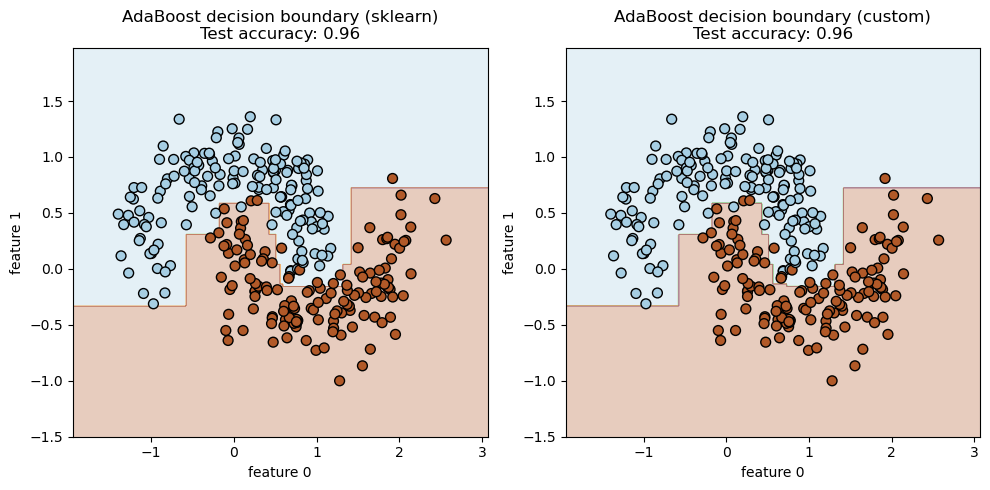

In [4]:
## SYNTHETIC DATA TEST ##

import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

def plot_2d_clf(X, y, clf, ax, name, random_state):
    """ Trains a classifier on data and plots the decision boundary onto a given axis
    @params:
        X: a 2D (n_samples x 2) numpy array of synthetic data
        y: a 1D (n_samples) numpy array of class labels {0,1}
        clf: an initialized classifier object
        ax: an axis to plot onto
        name: text to display in plot title
        random_state: numpy random state for train/test splitting
    @output: None
    """
    # split data
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=random_state)
    # fit classifier
    try:
        clf.train(X_train, y_train)
    except AttributeError:
        clf.fit(X_train, y_train)

    # choose two features to visualize (0 and 1)
    x_idx, y_idx = 0, 1

    # mesh for plotting (cover both train and test ranges)
    xmin = np.min(np.r_[X_train[:, x_idx], X_test[:, x_idx]]) - 0.5
    xmax = np.max(np.r_[X_train[:, x_idx], X_test[:, x_idx]]) + 0.5
    ymin = np.min(np.r_[X_train[:, y_idx], X_test[:, y_idx]]) - 0.5
    ymax = np.max(np.r_[X_train[:, y_idx], X_test[:, y_idx]]) + 0.5
    xx, yy = np.meshgrid(np.linspace(xmin, xmax, 300), np.linspace(ymin, ymax, 300))

    # build full-dimensional grid points by fixing other features at their training mean
    mean_features = np.mean(X_train, axis=0)
    grid2d = np.c_[xx.ravel(), yy.ravel()]
    n_pts = grid2d.shape[0]
    full_grid = np.tile(mean_features, (n_pts, 1))
    full_grid[:, x_idx] = grid2d[:, 0]
    full_grid[:, y_idx] = grid2d[:, 1]

    # predict on the grid and plot
    Z = clf.predict(full_grid).reshape(xx.shape)

    # calculate the test score
    try:
        test_score = clf.score(X_test, y_test)
    except:
        y_hat = clf.predict(X_test)
        y_hat = np.where(y_hat < 0, 0, 1)
        test_score = accuracy_score(y_test, y_hat)

    # plot decision boundary and test points
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
    ax.scatter(X_test[:, x_idx], X_test[:, y_idx], c=y_test, cmap=plt.cm.Paired, edgecolor='k', s=50)
    ax.set_xlabel(f'feature {x_idx}')
    ax.set_ylabel(f'feature {y_idx}')
    ax.set_title(f'AdaBoost decision boundary ({name})\nTest accuracy: {test_score:.2f}')
    
    return None

fig, axes = plt.subplots(1,2,figsize=(10,5))

RS = 42
X,y = make_moons(noise=0.2, random_state=RS, n_samples=1000)
plot_2d_clf(X, y, clf=AdaBoostClassifier(), ax=axes[0], name='sklearn',random_state=RS)
plot_2d_clf(X, y, clf=AdaBoost(), ax=axes[1], name='custom',random_state=RS)

plt.tight_layout()
plt.show()

## **Main**

The dataset we will be using to reproduce `sklearn` results is the `Breast Cancer Wisconsin (Diagnostic)` dataset from the University of Wisconsin (UW), and can be accessed through the [UCI Machine Learning repository](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic) or from [Kaggle](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data). It can also be accessed through the UW CS `ftp` server:

```zsh
ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/
```

The data are generated from digitized images of fine needle aspirates of breast mass. Each metric describes characteristics of the cell nuclei present in the image: radius, texture, perimeter, area, smoothness, etc. The mean, standard error, and "worst" or largest value of each of these metrics was computed for each image and encoded below for a total of 30 features. The target variable `diagnosis` is a binary classification of malignant (`M`) or benign (`B`). Read more about the dataset at: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data/data

In [5]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# set seed
np.random.seed(0)

# read in data and clean
df = pd.read_csv('../data/wisc_breast_cancer.csv')
df.drop(['id','Unnamed: 32'], axis=1, inplace=True)

target = np.array(df['diagnosis'])
y = np.where(target == 'M', 1, -1)

X = df.drop('diagnosis', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8)

# NOTE: The standard scaler will not impact the results here since these are tree-based learners
# but it produces a nicer looking decision boundary and (as a bonus) converts our data to numpy arrays for us
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
import timeit
# sklearn AdaBoostClassifier
t1 = timeit.default_timer()
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
t2 = timeit.default_timer()

# our implementation AdaBoost() using Stump()
t3 = timeit.default_timer()
clf = AdaBoost()
clf.train(X_train, y_train)
t4 = timeit.default_timer()

# results
print(f'AdaBoostClassifier (sklearn):\nscore:{ada.score(X_test, y_test)}\ntime:{t2-t1}\n')
print(f'AdaBoost (this notebook):\nscore:{accuracy_score(y_test, clf.predict(X_test))}\ntime:{t4-t3}')

AdaBoostClassifier (sklearn):
score:0.9736842105263158
time:0.07407158403657377

AdaBoost (this notebook):
score:0.9736842105263158
time:11.070893249940127


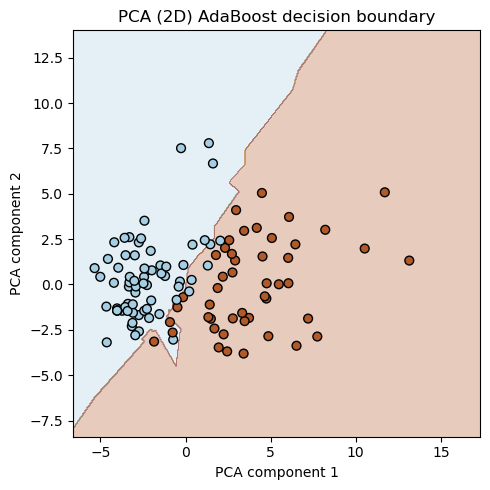

In [7]:
# use PCA to visualize the decision boundary
from sklearn.decomposition import PCA
def plot_with_pca(X_train, clf, X_test, y_test, ax, rs=0):
    # PCA to 2D on training data
    pca = PCA(n_components=2, random_state=0)
    X_train_2d = pca.fit_transform(X_train)
    X_test_2d = pca.transform(X_test)

    # Build a grid in PCA space
    xmin, xmax = X_train_2d[:, 0].min() - 1.0, X_train_2d[:, 0].max() + 1.0
    ymin, ymax = X_train_2d[:, 1].min() - 1.0, X_train_2d[:, 1].max() + 1.0
    xx, yy = np.meshgrid(np.linspace(xmin, xmax, 400), np.linspace(ymin, ymax, 400))

    # Map grid back to original feature space and predict with sklearn ada
    grid_pca = np.c_[xx.ravel(), yy.ravel()]
    grid_orig = pca.inverse_transform(grid_pca)  # back to original feature space
    Z = clf.predict(grid_orig).reshape(xx.shape)

    # Plot
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)

    # Scatter training and test points colored by labels (-1, 1)
    # ax.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, cmap=plt.cm.Paired, edgecolor='k', s=40, label='train')
    ax.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_test, cmap=plt.cm.Paired, edgecolor='k', s=40, marker='o')

    ax.set_xlabel('PCA component 1')
    ax.set_ylabel('PCA component 2')
    ax.set_title(f'PCA (2D) AdaBoost decision boundary')
    # ax.legend(loc='best')

fig, axes = plt.subplots(1,1,figsize=(5,5))
plot_with_pca(X_train, clf, X_test, y_test, ax=axes)
plt.tight_layout()
plt.show()